# **Loan Risk Analysis**


Lending Club is a financial institute in the United State providing peer to peer lending.  The company matches investors(the lenders)'s risk appetite and borrowers' risk rating when issuing the loan with a personalised interest rate <br>
https://www.lendingclub.com/
<br><br>

Loan data are gathered from Kaggle website. <br>
https://www.kaggle.com/wendykan/lending-club-loan-data
<br><br>


Purpose of this project is to identify the relatioship between attributes of borrowers (loan application information, financial information, demographic informtion) and their loan conditions (good loans or bad loans) and to build a predictive model to predict whether a new loan application will be a good loan or a bad loan.


**Install packages**

In [ ]:
!pip install chart_studio

In [ ]:
import chart_studio
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
#chart_studio.tools.set_credentials_file(username='', api_key='')

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
import time
import os
import ipywidgets

% matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,zh-TW;q=0.8,zh;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/34%2F1110834%2Fcompressed%2Floan.csv.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593560910&Signature=eL0UOAyRjhRSHJbs5mxmsUzQ%2BdwVpp%2B2zTPelKIVQEOAclx0loftKaVhz0Sm7YwGNFouivbh9X5pb40Ij9qeRoyQgYi6WCqwFn%2F%2BHJaEwS7ZITEx2HSOBh1lUdGCf%2FHHmWHGlEEATfnMBaSttBCOGZsgDfqJQTT4RBbfQ%2BRNQuW0cHDjXEi1SyhndERL5ov5WD5g8PYEbMPxkBqMB8I06ScyRgslFFpMw90cmSGQgzoLaAfIw4XVvOTO4nGseXsxTQjQWH0OpNx5J1HyRy3W61y4EdBSWQwYmjj%2FOOLAFZJZ5d2TBMX%2F2hInP6VDRK5AKEq%2BLrwGo7s7OIhPIiEeRQ%3D%3D" -c -O '34_1110834_compressed_loan.csv.zip'

--2020-06-28 02:49:13--  https://storage.googleapis.com/kaggle-data-sets/34%2F1110834%2Fcompressed%2Floan.csv.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593560910&Signature=eL0UOAyRjhRSHJbs5mxmsUzQ%2BdwVpp%2B2zTPelKIVQEOAclx0loftKaVhz0Sm7YwGNFouivbh9X5pb40Ij9qeRoyQgYi6WCqwFn%2F%2BHJaEwS7ZITEx2HSOBh1lUdGCf%2FHHmWHGlEEATfnMBaSttBCOGZsgDfqJQTT4RBbfQ%2BRNQuW0cHDjXEi1SyhndERL5ov5WD5g8PYEbMPxkBqMB8I06ScyRgslFFpMw90cmSGQgzoLaAfIw4XVvOTO4nGseXsxTQjQWH0OpNx5J1HyRy3W61y4EdBSWQwYmjj%2FOOLAFZJZ5d2TBMX%2F2hInP6VDRK5AKEq%2BLrwGo7s7OIhPIiEeRQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 355523011 (339M) [application/zip]
Saving to: ‘34_1110834_compressed_loan.csv.zip’

34_1110834_compress 100%[===================>] 339.05M   110MB/s    

In [ ]:
#os.listdir()  ##get the name of the zip file
!unzip 34_1110834_compressed_loan.csv.zip

Archive:  34_1110834_compressed_loan.csv.zip
  inflating: loan.csv                


In [ ]:
original_df = pd.read_csv('loan.csv', low_memory=False)

In [ ]:
# Original data has 2 million rows over 2GB. Sampling only a portion to fit in Google Colab notebook for faster data analysis and modelling
df = original_df.sample(frac=0.5, replace=False, random_state=8)
#df = original_df.copy()
#df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130334 entries, 885984 to 1357723
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 1.2+ GB


In [ ]:
# Replace the name of some columns
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})
# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)


## Exploring Data:



**Average Loan Amount Issued By Year** <br>
Average loans amount issued stayed similiar from 2013 to 2017 then increased slightly


In [ ]:
# Transform the loan issue dates to year
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

Text(0, 0.5, 'Average loan amount issued')

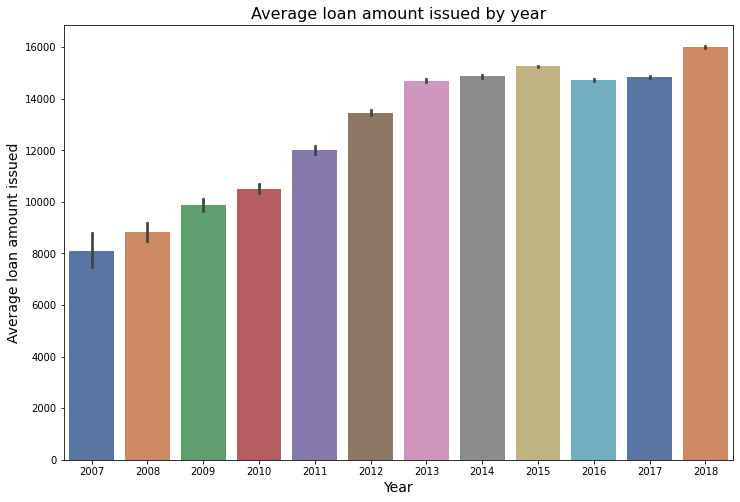

In [ ]:
# Average Loan Amount Issued by Year
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amount', data=df, palette='deep')
plt.title('Average loan amount issued by year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

**Loan Status** <br>
Most loans status are current (good loans) and the rest (bad loans) are not up to date or written off or defaulted.  The good and bad classes are imbalanced.

In [ ]:
df.loan_status.value_counts()


Fully Paid                                             521092
Current                                                459395
Charged Off                                            131028
Late (31-120 days)                                      11012
In Grace Period                                          4517
Late (16-30 days)                                        1890
Does not meet the credit policy. Status:Fully Paid       1011
Does not meet the credit policy. Status:Charged Off       374
Default                                                    15
Name: loan_status, dtype: int64

**Loan Condition** <br>
Add a new column "loan_condition" with 2 values "Good Loan" and "Bad Loan" classified by loan status

In [ ]:
# Define loan_condition : bad_loan and good_loan by loan_status

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'   
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

**Loan Conditions by Year** <br>
Bad loan is an imbalanced class with only 13% of loans. <br>
Bad loan rate was higher in 2015 and 2016

[Text(0, 0.5, '(%)')]

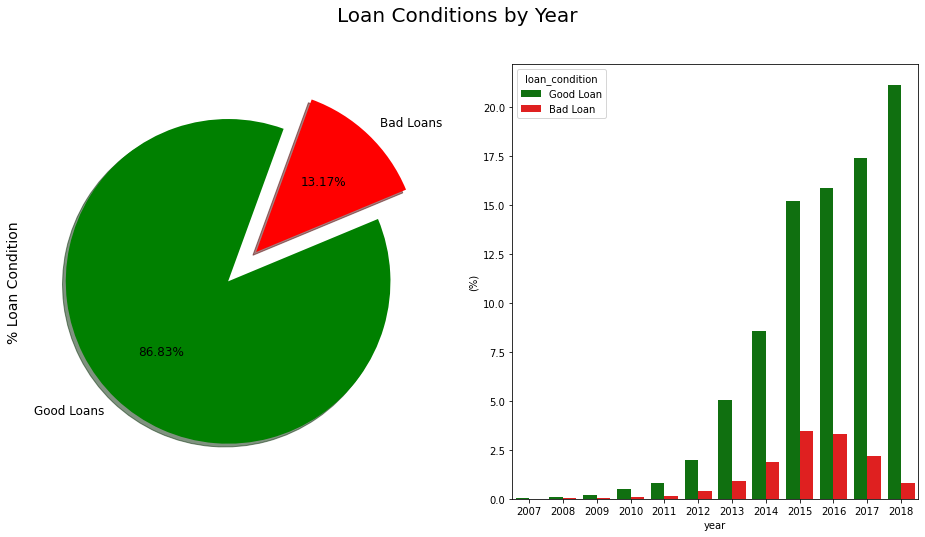

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["green", "red"]
labels ="Good Loans", "Bad Loans"
plt.suptitle('Loan Conditions by Year', fontsize=20)
df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% Loan Condition', fontsize=14)

palette = ["green", "red"]
sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

**Amount of Loan Issued by Region**

In [ ]:
# Define Region by States

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'   

df['region'] = df['addr_state'].apply(finding_regions)

In [ ]:
# Format loan issued date
df['complete_date'] = pd.to_datetime(df['issue_d'])
group_dates = df.groupby(['complete_date', 'region'], as_index=False).sum()
group_dates['issue_d'] = [month.to_period('M') for month in group_dates['complete_date']]
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amount'] = group_dates['loan_amount']/1000000
df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amount']])

Text(0.5, 1.0, 'Loans issued by Region (in millions)')

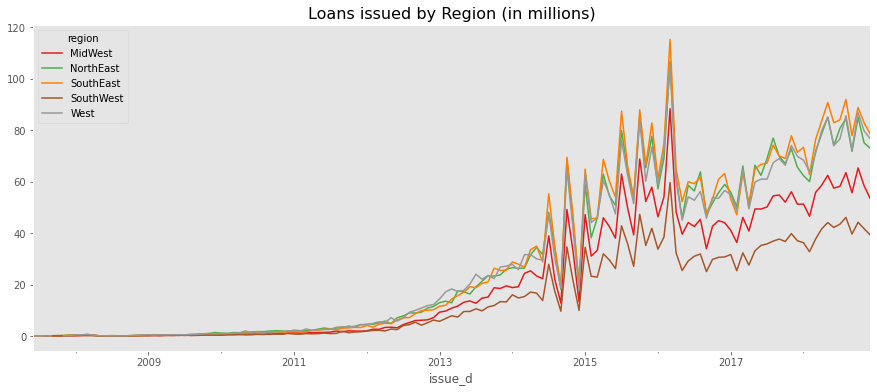

In [ ]:
plt.style.use('ggplot')
cmap = plt.cm.Set1

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amount.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region (in millions)', fontsize=16)

In [ ]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Convert emp_length to integers
lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0   
    

Bad Loans by Region

In [ ]:
# loans categorized as bad loans
badloans_df = df.loc[df["loan_condition"] == "Bad Loan"]

# bad loans by region 
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100, axis=0).apply(lambda x: round(x, 2))
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])
loan_status_cross

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days)
region,,,,,,
MidWest,17.25,40.00,18.45,16.49,13.97,16.35
NorthEast,23.27,13.33,26.47,26.43,26.56,24.64
SouthEast,25.10,20.00,24.87,25.95,26.14,25.91
SouthWest,12.06,13.33,10.96,10.74,12.54,12.58
West,22.32,13.33,19.25,20.39,20.79,20.52


In [ ]:
number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans by region
number_of_loanstatus

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,,
MidWest,22598,6,69,745,264,1801,25483
NorthEast,30493,2,99,1194,502,2713,35003
SouthEast,32885,3,93,1172,494,2853,37500
SouthWest,15803,2,41,485,237,1385,17953
West,29249,2,72,921,393,2260,32897


In [ ]:
charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
not_meet_credit = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = loan_status_cross['In Grace Period'].values.tolist()
short_pay = loan_status_cross['Late (16-30 days)'] .values.tolist()
long_pay = loan_status_cross['Late (31-120 days)'].values.tolist()

In [ ]:
charged = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= charged_off,
    name='Charged Off',
    marker=dict(
        color='rgb(192, 148, 246)'
    ),
    text = '%'
)

defaults = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y=default,
    name='Defaults',
    marker=dict(
        color='rgb(176, 26, 26)'
    ),
    text = '%'
)

credit_policy = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= not_meet_credit,
    name='Does not meet Credit Policy',
    marker = dict(
        color='rgb(100, 200, 36)'
    ),
    text = '%'
)

grace = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= grace_period,
    name='Grace Period',
    marker = dict(
        color='rgb(147, 147, 147)'
    ),
    text = '%'
)

short_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= short_pay,
    name='Late Payment (16-30 days)', 
    marker = dict(
        color='rgb(50, 157, 135)'
    ),
    text = '%'
)

long_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= long_pay,
    name='Late Payment (31-120 days)',
    marker = dict(
        color = 'rgb(08, 26, 44)'
        ),
    text = '%'
)


data = [charged, defaults, credit_policy, grace, short_pays, long_pays]
layout = go.Layout(
    barmode='stack',
    title = '% of Bad Loan Status by Region',
    xaxis=dict(title='US Regions')
)

fig = go.Figure(data=data, layout=layout)
fig.show()
#iplot(fig, filename='stacked-bar')


Loan Issued by State

In [ ]:
# Plotting by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()



# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()
average_interest_rates = by_interest_rate['interest_rate'].values.tolist()
average_annual_income = by_income['annual_income'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()


,state_codes,issued_loans,interest_rate,annual_income
0,IA,37550,13.23,43825.00
1,IL,704054625,12.95,79975.72
2,IN,274129175,13.16,71109.64
3,KS,141591800,13.05,70334.60
4,MI,421800575,13.18,71645.62


In [ ]:
# Now it comes the part where we plot out plotly United States map

for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(255, 255, 198)'],[0.2, 'rgb(230, 245, 169)'],[0.4, 'rgb(220, 235, 145)'],\
            [0.6, 'rgb(180, 220, 125)'],[0.8, 'rgb(155, 201, 87)'],[1.0, 'rgb(80, 180, 40)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(55,55,55)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Loans Issued Amount By State',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(155, 155, 255)')
)

fig = go.Figure(data=data, layout=layout)
fig.show()
#iplot(fig, filename='d3-cloropleth-map')

**Bad loan by State**

In [ ]:
by_condition = df.groupby('addr_state')['loan_condition'].value_counts()/ df.groupby('addr_state')['loan_condition'].count()
loan_condition_bystate = pd.crosstab(df['addr_state'], df['loan_condition'] )
cross_condition = pd.crosstab(df["addr_state"], df["loan_condition"])
percentage_loan_contributor = pd.crosstab(df['addr_state'], df['loan_condition']).apply(lambda x: x/x.sum() * 100)
condition_ratio = cross_condition["Bad Loan"]/cross_condition["Good Loan"]
by_dti = df.groupby('addr_state', as_index=False).dti.mean()
state_codes = sorted(states)

# Take to a list
bad_to_good_loan_ratio = condition_ratio.values.tolist()
average_dti = by_dti['dti'].values.tolist()
number_of_badloans = loan_condition_bystate['Bad Loan'].values.tolist()
percentage_ofall_badloans = percentage_loan_contributor['Bad Loan'].values.tolist()


risk_data = OrderedDict([('state_codes', state_codes),
                         ('bad_to_good_loan_ratio',bad_to_good_loan_ratio),
                         ('bad_loans_number', number_of_badloans),
                         ('percentage_of_all_bad_loans', percentage_ofall_badloans),
                         ('average_dti', average_dti)])


risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)


In [ ]:
# Bad loan % on United States map

for col in risk_df.columns:
    risk_df[col] = risk_df[col].astype(str)
    
scl = [[0.0, 'rgb(240, 220, 220)'],[0.2, 'rgb(225, 200, 200)'],[0.4, 'rgb(230, 150, 150)'],\
            [0.6, 'rgb(240, 120, 120)'],[0.8, 'rgb(245, 100, 100)'],[1.0, 'rgb(255, 20, 20)']]

risk_df['text'] = risk_df['state_codes'] + '<br>' +\
'Number of Bad Loans: ' + risk_df['bad_loans_number'] + '<br>' + \
'Percentage of all Bad Loans: ' + risk_df['percentage_of_all_bad_loans'] + '%' +  '<br>' + \
'Average Debt-to-Income Ratio: ' + risk_df['average_dti'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = risk_df['state_codes'],
        z = risk_df['bad_to_good_loan_ratio'], 
        locationmode = 'USA-states',
        text = risk_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(22,22,22)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Bad to Good Loan Ratio By Number <br>By State',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(155, 155, 255)')
)

#fig = dict(data=data, layout=layout)
#iplot(fig, filename='d3-cloropleth-map')

fig = go.Figure(data=data, layout=layout)
fig.show()

**Loan Condition**<br>
More bad loans in the middle risk grades<br>
Bad loans are on aveage with higher loan interest rate


Text(0, 0.5, 'Interest Rate (%)')

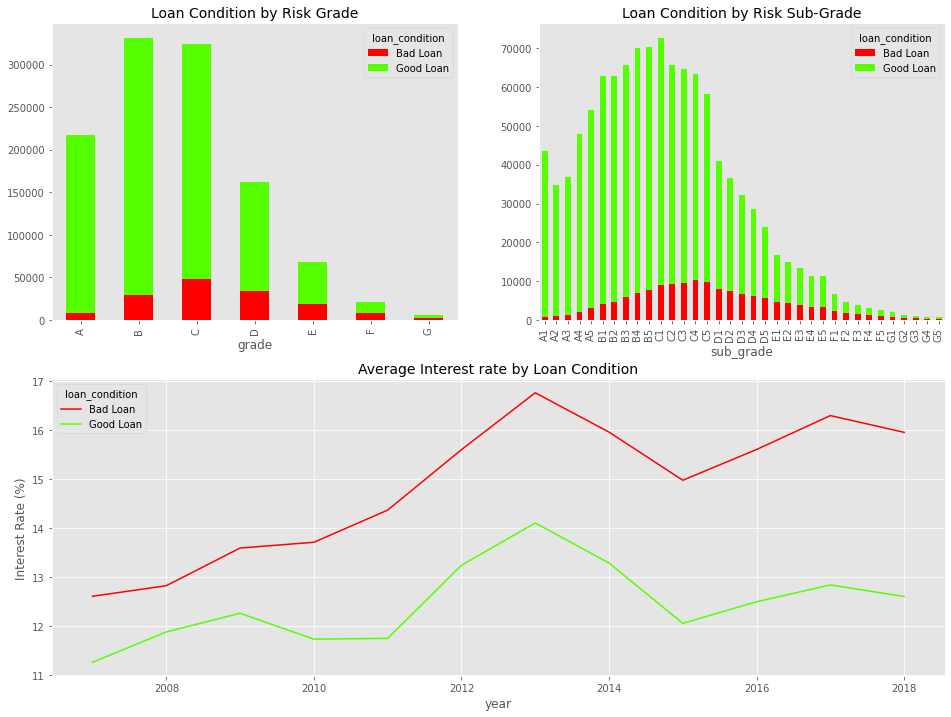

In [ ]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.prism

loans_by_region = df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Loan Condition by Risk Grade', fontsize=14)


loans_by_grade = df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Loan Condition by Risk Sub-Grade', fontsize=14)

by_interest = df.groupby(['year', 'loan_condition']).interest_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

In [ ]:
print(df['interest_rate'].describe())
# Average interest is 13.08

# Classify interet_payments into two groups 'Low' and 'High' by interest rate
df['interest_payments'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['interest_rate'] <= 13.08, 'interest_payments'] = 'Low'
    col.loc[col['interest_rate'] > 13.08, 'interest_payments'] = 'High'
    


count    1.130334e+06
mean     1.308985e+01
std      4.831192e+00
min      5.310000e+00
25%      9.490000e+00
50%      1.262000e+01
75%      1.599000e+01
max      3.099000e+01
Name: interest_rate, dtype: float64


**Loan Conditon**<br>
Loan Purpose showed different % of loan condition

In [ ]:
purpose_condition = round(pd.crosstab(df['loan_condition'], df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_good_loans = purpose_condition.values[1].tolist()
purpose = purpose_condition.columns


bad_plot = go.Bar(
    x=purpose,
    y=purpose_bad_loans,
    name = 'Bad Loans',
    text='%',
    marker=dict(
        color='rgba(219, 64, 182, 0.7)',
        line = dict(
            color='rgba(219, 64, 182, 1.0)',
            width=2
        )
    )
)

good_plot = go.Bar(
    x=purpose,
    y=purpose_good_loans,
    name='Good Loans',
    text='%',
    marker=dict(
        color='rgba(50, 171, 196, 0.7)',
        line = dict(
            color='rgba(50, 171, 196, 1.0)',
            width=2
        )
    )
)


data = [bad_plot, good_plot]

layout = go.Layout(
    title='Loan Condition by Loan Purpose',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='% of the Loan',
    ),
    paper_bgcolor='lightgrey',
    plot_bgcolor='white',
    showlegend=True
)


#fig = dict(data=data, layout=layout)
#iplot(fig, filename='condition_purposes')
fig =  go.Figure(data=data, layout=layout)
fig.show()

**Income Category** <br>
Lower income category normally charged with higher interest rate

In [ ]:
# define income category by annual income

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

In [ ]:
# Get Income, Loan Purpose and mean interest rate table
group_income_purpose = df.groupby(['income_category', 'purpose'], as_index=False).interest_rate.mean()
group_dti_purpose = df.groupby(['income_category', 'purpose'], as_index=False).loan_amount.mean()
loan_a = group_dti_purpose['loan_amount'].values

new_groupby = group_income_purpose.assign(total_loan_amount=loan_a)
sort_group_income_purpose = new_groupby.sort_values(by="income_category", ascending=True)

In [ ]:
# Get Income, Loan Purpose and Good loans count & Bad Loans count table
loan_count = df.groupby(['income_category', 'purpose'])['loan_condition'].apply(lambda x: x.value_counts())
d={"loan_c": loan_count}
loan_c_df = pd.DataFrame(data=d).reset_index()
loan_c_df = loan_c_df.rename(columns={"level_2": "loan_condition"})

good_loans = loan_c_df.loc[loan_c_df['loan_condition'] == "Good Loan"].sort_values(by="income_category", ascending=True)
bad_loans = loan_c_df.loc[loan_c_df['loan_condition'] == "Bad Loan"].sort_values(by="income_category", ascending=True)

merged_good = sort_group_income_purpose.merge(good_loans, on=['income_category', 'purpose'], how='left').fillna(0)
merged_good.rename(columns={'loan_c':'good_loan_count'}, inplace=True)
merged_good_bad = merged_good.merge(bad_loans, on=['income_category', 'purpose'], how='left').fillna(0)
merged_good_bad.rename(columns={'loan_c':'bad_loan_count'}, inplace=True)

In [ ]:
# Get all information into one table
sort_group_income_purpose.sort_values(by=['income_category','purpose'], ascending=[True,True], inplace=True)
merged_good_bad.sort_values(by=['income_category','purpose'], ascending=[True,True], inplace=True)
sort_group_income_purpose['good_loan_count'] = merged_good_bad['good_loan_count']
sort_group_income_purpose['bad_loan_count'] = merged_good_bad['bad_loan_count']
sort_group_income_purpose['total_loans_count'] = (sort_group_income_purpose['good_loan_count'].values + sort_group_income_purpose['bad_loan_count'].values)
sort_group_income_purpose['bad loan ratio (%)'] = np.around(sort_group_income_purpose['bad_loan_count'].values / (sort_group_income_purpose['good_loan_count'].values + sort_group_income_purpose['bad_loan_count'].values), 4) * 100
final_df = sort_group_income_purpose
final_df.sort_values(by=['income_category','purpose'], ascending=[True,True], inplace=True)
final_df.style.background_gradient('Accent')

,income_category,purpose,interest_rate,total_loan_amount,good_loan_count,bad_loan_count,total_loans_count,bad loan ratio (%)
0,High,car,10.621000,18267.250000,189,11.000000,200.000000,5.500000
1,High,credit_card,10.503332,26397.903068,13,4.000000,17.000000,23.530000
2,High,debt_consolidation,11.962333,26559.616403,89,10.000000,99.000000,10.100000
3,High,home_improvement,11.478302,25492.439166,515,103.000000,618.000000,16.670000
4,High,house,13.207626,28726.528777,1369,142.000000,1511.000000,9.400000
5,High,major_purchase,11.846829,23308.321429,148,14.000000,162.000000,8.640000
6,High,medical,12.289620,17656.844106,12,0.000000,12.000000,0.000000
7,High,moving,13.588457,19647.839506,642,58.000000,700.000000,8.290000
8,High,other,13.149186,22737.342819,253,25.000000,278.000000,8.990000
9,High,renewable_energy,13.465833,25516.666667,3133,319.000000,3452.000000,9.240000


In [ ]:
# Labels
purpose_labels_high = final_df['purpose'].loc[final_df['income_category'] == 'High'].tolist()
purpose_labels_medium = final_df['purpose'].loc[final_df['income_category'] == 'Medium'].tolist()
purpose_labels_low = final_df['purpose'].loc[final_df['income_category'] == 'Low'].tolist()

# Average Interest Rate Dot Plots # 1st Subplot
high_income = final_df['interest_rate'].loc[final_df['income_category'] == 'High'].values.tolist()
medium_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Medium'].values.tolist()
low_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Low'].values.tolist()

high_lst = ['%.2f' % val for val in high_income]
med_lst = ['%.2f' % val for val in medium_income]
low_lst = ['%.2f' % val for val in low_income]


trace1 = go.Bar(
    x=purpose_labels_high,
    y=high_lst,
    name='High Income',
    marker=dict(
        color='rgba(50, 171, 196, 0.7)',
        line = dict(
            color='rgba(50, 171, 196, 1.0)',
            width=2
        )
    )
)

trace2 = go.Bar(
    x=purpose_labels_medium,
    y=med_lst,
    name='Medium Income',
    marker=dict(
        color='rgba(250, 205, 5, 0.7)',
        line = dict(
            color='rgba(250, 205, 5, 1.0)',
            width=2
        )
    )
)

trace3 = go.Bar(
    x=purpose_labels_low,
    y=low_lst,
    name='Low Income',
    marker=dict(
        color='rgba(250, 71, 96, 0.7)',
        line = dict(
            color='rgba(250, 71, 96, 1.0)',
            width=2
        )
    )
)
data = [trace1, trace2, trace3]
layout = {"title": "Average Loan Interest Rate <br> <i>by Purpose by Income Category </i> ",
          "xaxis": {"title": "Loan Purpose", },
          "yaxis": {"title": "Average Loan Interest Rate"}}

fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    margin=dict(l=20, r=20, t=45, b=20),
    paper_bgcolor="LightGreen",
)
fig.show()



## Predictive Modelling

Imputing Null Values in Categorical and Numeric Columns

In [ ]:
# Add the target column loan_condition_int by classifying loan condition into integer

lst = [df]
df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Good loan = 0
    col.loc[df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Bad loan = 1
    
# Convert from float to int the column (This is our label)  
df['loan_condition_int'] = df['loan_condition_int'].astype(int)

In [ ]:
# Copy Dataframe
complete_df = df.copy()

In [ ]:
# Transform Missing Values for numeric dataframe
# Nevertheless check what these variables mean tomorrow in the morning.
for col in ('dti_joint', 'annual_inc_joint', 'il_util', 'mths_since_rcnt_il', 'open_acc_6m',  'open_il_12m',
           'open_il_24m', 'inq_last_12m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
            'num_tl_120dpd_2m', 'num_tl_30dpd',  'num_tl_90g_dpd_24m',  'num_tl_op_past_12m',  'pct_tl_nvr_dlq',  'percent_bc_gt_75',
            'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',  'total_bal_ex_mort', 'total_bc_limit',  'total_il_high_credit_limit',
           'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq', 'total_bal_il', 'tot_coll_amt',
           'tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'collections_12_mths_ex_med', 'open_acc', 'inq_last_6mths'):
    complete_df[col] = complete_df[col].fillna(0)
    
complete_df['annual_income'].fillna(complete_df['annual_income'].mean(), inplace=True)
sum(complete_df['annual_income'].isna())
complete_df["income_category"].fillna(complete_df['income_category'].mode()[0], inplace=True)
sum(complete_df['income_category'].isna())

# # Get the mode of next payment date and last payment date and the last date credit amount was pulled   
complete_df["next_pymnt_d"] = complete_df.groupby("region")["next_pymnt_d"].transform(lambda x: x.fillna(x.mode))
complete_df["last_pymnt_d"] = complete_df.groupby("region")["last_pymnt_d"].transform(lambda x: x.fillna(x.mode))
complete_df["last_credit_pull_d"] = complete_df.groupby("region")["last_credit_pull_d"].transform(lambda x: x.fillna(x.mode))
complete_df["earliest_cr_line"] = complete_df.groupby("region")["earliest_cr_line"].transform(lambda x: x.fillna(x.mode))

# # Get the mode on the number of accounts in which the client is delinquent
complete_df["pub_rec"] = complete_df.groupby("region")["pub_rec"].transform(lambda x: x.fillna(x.median()))

# # Get the mean of the annual income depending in the region the client is located.
complete_df["annual_income"] = complete_df.groupby("region")["annual_income"].transform(lambda x: x.fillna(x.mean()))

# Get the mode of the  total number of credit lines the borrower has 
complete_df["total_acc"] = complete_df.groupby("region")["total_acc"].transform(lambda x: x.fillna(x.median()))

# Mode of credit delinquencies in the past two years.
complete_df["delinq_2yrs"] = complete_df.groupby("region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))
complete_df['income_category'] = complete_df.groupby("region")['income_category'].transform(lambda x: x.fillna(x.mode()))
complete_df['home_ownership'] = complete_df.groupby("region")['home_ownership'].transform(lambda x: x.fillna(x.mode()))
complete_df['purpose'] = complete_df.groupby("region")['purpose'].transform(lambda x: x.fillna(x.mode()))
complete_df["emp_length_int"] = complete_df.groupby("region")["emp_length_int"].transform(lambda x: x.fillna(x.mean()))


Feature Engineering

In [ ]:
used_col = ['dti_joint', 'annual_inc_joint', 'il_util', 'mths_since_rcnt_il', 'open_acc_6m',  'open_il_12m',
           'open_il_24m', 'inq_last_12m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
            'num_tl_120dpd_2m', 'num_tl_30dpd',  'num_tl_90g_dpd_24m',  'num_tl_op_past_12m',  'pct_tl_nvr_dlq',  'percent_bc_gt_75',
            'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',  'total_bal_ex_mort', 'total_bc_limit',  'total_il_high_credit_limit',
           'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq', 'total_bal_il', 'tot_coll_amt',
           'tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'collections_12_mths_ex_med', 'open_acc', 'inq_last_6mths',
           "delinq_2yrs","total_acc","pub_rec",'sub_grade', 'income_category', 'region','emp_length_int', 'loan_condition_int', 'emp_length_int',
            'home_ownership', 'purpose']
complete_df = complete_df[used_col]

In [ ]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130334 entries, 885984 to 1357723
Data columns (total 48 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   dti_joint                    1130334 non-null  float64
 1   annual_inc_joint             1130334 non-null  float64
 2   il_util                      1130334 non-null  float64
 3   mths_since_rcnt_il           1130334 non-null  float64
 4   open_acc_6m                  1130334 non-null  float64
 5   open_il_12m                  1130334 non-null  float64
 6   open_il_24m                  1130334 non-null  float64
 7   inq_last_12m                 1130334 non-null  float64
 8   open_rv_12m                  1130334 non-null  float64
 9   open_rv_24m                  1130334 non-null  float64
 10  max_bal_bc                   1130334 non-null  float64
 11  all_util                     1130334 non-null  float64
 12  inq_fi                       1130334 

In [ ]:
complete_df.columns

Index(['dti_joint', 'annual_inc_joint', 'il_util', 'mths_since_rcnt_il',
       'open_acc_6m', 'open_il_12m', 'open_il_24m', 'inq_last_12m',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_since_last_delinq', 'total_bal_il', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'revol_util', 'collections_12_mths_ex_med',
       'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'total_acc', 'pub_rec',
       'sub_grade', 'income_category', 'region', 'emp_length_int',
       'loan_condition_int', 'emp_length_int', 'home_ownership', 'purpose'],
      dtype='object')

In [ ]:
complete_df.isnull().sum().max() #should be 0


0

Splitting Train and Test set according to imbalanced classes

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression


len(complete_df['loan_condition_int'])
# Loan Ratios (Imbalanced classes)
#complete_df['loan_condition_int'].value_counts()/len(complete_df['loan_condition_int']) * 100
complete_df['loan_condition_int'].value_counts(normalize=True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



0    0.868326
1    0.131674
Name: loan_condition_int, dtype: float64

In [ ]:
X = complete_df.drop('loan_condition_int', axis=1).reset_index(drop=True)
y = complete_df["loan_condition_int"].reset_index(drop=True)
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=8)
sss.get_n_splits(X, y)

1

In [ ]:
for train_index, test_index in sss.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print("Train set label ratio: " , y_train.value_counts(normalize=True))
print("Test set label ratio: " , y_test.value_counts(normalize=True))


Train set label ratio:  0    0.868325
1    0.131675
Name: loan_condition_int, dtype: float64
Test set label ratio:  0    0.868327
1    0.131673
Name: loan_condition_int, dtype: float64


Encoding Categorical Columns and Scaling Numeric Columns


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler


numeric = X_train.select_dtypes(exclude=["object"])
categorical = X_train.select_dtypes(["object"])

numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(numeric.columns.tolist())),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical.columns.tolist())), # We will have to write the categorical columns manually and see if it works.
    ('encoder', CategoricalEncoder(encoding="onehot-dense")),
])

# Combine both Pipelines into one array
combined_pipeline = FeatureUnion(transformer_list=[
    ('numeric_pipeline', numeric_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])

In [ ]:
categorical

,sub_grade,income_category,region,home_ownership,purpose
401753,B3,Medium,West,MORTGAGE,debt_consolidation
571293,E2,Low,MidWest,RENT,renewable_energy
307185,B2,Low,West,MORTGAGE,credit_card
125645,D3,Medium,West,MORTGAGE,debt_consolidation
360789,B5,Low,West,RENT,debt_consolidation
...,...,...,...,...,...
615820,A5,Low,NorthEast,OWN,credit_card
811760,A2,Low,West,MORTGAGE,credit_card
710911,A1,Low,West,MORTGAGE,credit_card
754088,C4,Low,SouthEast,MORTGAGE,home_improvement


In [ ]:
X_train = combined_pipeline.fit_transform(X_train)
X_test = combined_pipeline.fit_transform(X_test)

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
# log_reg_sm = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

normal_ypred = log_reg.predict(X_test)
print(accuracy_score(y_test, normal_ypred))

0.8684283862748654


TensorFlow Deep Learning Model

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Reset graph in case of reusing
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
def fetch_batch(epoch, batch_index, batch_size, instances=X_train.shape[0]):
    np.random.seed(epoch * n_batches + batch_index)
    indices = np.random.randint(instances, size=batch_size)  
    X_batch = X_train[indices] 
    y_batch = y_train.iloc[indices]
    return X_batch, y_batch
    
reset_graph()



# Neural Network with TensorFlow 

n_inputs = X_train.shape[1]
hidden1_amount = 100
hidden2_amount = 100
hidden3_amount = 100
n_outputs = 2

# Placeholders
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

# Architectural Structure
with tf.name_scope('dnn'):
    #hidden1 = tf.layers.dense(X, hidden1_amount, activation=tf.nn.relu, name="first_layer")
    #hidden2 = tf.layers.dense(hidden1, hidden2_amount, activation=tf.nn.relu, name="second_layer")
    #logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
    hidden1 = tf.layers.dense(X, hidden1_amount, activation=tf.nn.relu, name="first_layer")
    hidden2 = tf.layers.dense(hidden1, hidden2_amount, activation=tf.nn.relu, name="second_layer")
    hidden3 = tf.layers.dense(hidden2, hidden3_amount, activation=tf.nn.relu, name="third_layer")
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")

# Loss Functions
with tf.name_scope("loss"):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                                  logits=logits)
    loss = tf.reduce_mean(cross_entropy, name="loss")
    
# optimizer
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    best_op = optimizer.minimize(loss)
    
# Evaluating
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [ ]:
batch_size = 500
n_batches = int(np.ceil(X_train.shape[0]/ batch_size))
n_epochs = 5
n_batches

1809

In [ ]:
with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(best_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_test, y: y_test})
        print(epoch+1, "Loss:{:.5f}\t Accuracy:{:.3f}%".format(loss_val, acc_val * 100))

1 Loss:0.35467	 Accuracy:86.835%
2 Loss:0.35458	 Accuracy:86.834%
3 Loss:0.35373	 Accuracy:86.844%
4 Loss:0.35432	 Accuracy:86.833%
5 Loss:0.35456	 Accuracy:86.830%
